In [22]:
#import modules
%reload_ext autoreload
#%autoreload 2
import os 
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import sqlite3

In [23]:
#instantiate our created data module
from data import StockDataApi
sda = StockDataApi()

In [25]:
ticker = 'MSFT'
df_microsoft = sda.Get_Data(ticker=ticker, outputsize=5000)
print('df type: ', type(df_microsoft))
print('df shape: ', df_microsoft.shape)
df_microsoft.head()

df type:  <class 'pandas.core.frame.DataFrame'>
df shape:  (5000, 5)


,open,high,low,close,volume
date,,,,,
2023-09-01,331.31000,331.98999,326.78000,328.66000,11731168.0
2023-08-31,329.20001,330.91000,326.78000,327.76001,26389000.0
2023-08-30,328.67001,329.81000,326.45001,328.79001,15222100.0
2023-08-29,321.88000,328.98001,321.88000,328.41000,19284600.0
2023-08-28,325.66000,326.14999,321.72000,323.70001,14808500.0


In [26]:
#assert statements
#does Get_Data return a dataframe?
assert isinstance(df_microsoft, pd.DataFrame)

# Does DataFrame have 5 columns?
assert len(df_microsoft.columns) == 5

# Does DataFrame have a DatetimeIndex?
assert isinstance(df_microsoft.index, pd.DatetimeIndex)

# Is the index name "date"?
df_microsoft.index.name == "date"

# Does DataFrame have correct column names?
assert list(df_microsoft.columns) == ['open', 'high', 'low', 'close', 'volume']

# Are columns correct data type?
assert all(df_microsoft.dtypes == float)

In [27]:
#setup connection to a database
connection = sqlite3.connect(database = os.getenv('DB_NAME'), check_same_thread = False)
print(type(connection))

<class 'sqlite3.Connection'>


In [28]:
print(os.getenv('DB_NAME'))

stocks.sqlite


In [29]:
#import class definition
from data import SQLRepository

#create instance of class
repo = SQLRepository(connection=connection, ticker="MSFT")

#Does repo have a 'connection' attribute
assert hasattr(repo, 'connection')

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

In [30]:
response = repo.insert_table(table_name=ticker, records=df_microsoft, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [31]:
df_microsoft = repo.read_table(table_name="MSFT", limit=2500)  # noQA F821

# Is `df_` a DataFrame?
assert isinstance(df_microsoft, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_microsoft.index, pd.DatetimeIndex)

# Is the index named "date"?
assert (df_microsoft.index.name == 'date')

# Does it have 2,500 rows and 5 columns?
assert (df_microsoft.shape == (2500,5))

# Are the column names correct?
assert list(df_microsoft.columns) == ['open', 'high', 'low', 'close', 'volume'] 

# Are the column data types correct?
assert all(df_microsoft.dtypes == float)

# Print `df_` info
print(df_microsoft.info())
print(df_microsoft.shape)
df_microsoft.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2023-09-01 to 2013-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None
(2500, 5)


,open,high,low,close,volume
date,,,,,
2023-09-01,331.31000,331.98999,326.78000,328.66000,11731168.0
2023-08-31,329.20001,330.91000,326.78000,327.76001,26389000.0
2023-08-30,328.67001,329.81000,326.45001,328.79001,15222100.0
2023-08-29,321.88000,328.98001,321.88000,328.41000,19284600.0
2023-08-28,325.66000,326.14999,321.72000,323.70001,14808500.0


COMPARING CLOSING PRICES OF APPLE AND MICROSOFT STOCKS

In [33]:
#Getting data for 'apple stock prices'
ticker  = "AAPL"
df_apple = sda.Get_Data(ticker=ticker, outputsize=5000)
print("type: ", type(df_apple))
print("df_apple info: ", df_apple.info())
df_apple.head()

type:  <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2023-09-01 to 2003-10-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5000 non-null   float64
 1   high    5000 non-null   float64
 2   low     5000 non-null   float64
 3   close   5000 non-null   float64
 4   volume  5000 non-null   float64
dtypes: float64(5)
memory usage: 234.4 KB
df_apple info:  None


,open,high,low,close,volume
date,,,,,
2023-09-01,189.485,189.92000,188.28000,189.47000,36396959.0
2023-08-31,187.840,189.12000,187.48000,187.87000,60735600.0
2023-08-30,184.940,187.85001,184.74001,187.64999,60813900.0
2023-08-29,179.700,184.89999,179.50000,184.12000,53003900.0
2023-08-28,180.090,180.59000,178.55000,180.19000,43820700.0


In [34]:
#setup connection to a database
n_connection = sqlite3.connect(database = os.getenv('DB_NAME'), check_same_thread = False)
#instantiate the sqlite repo
repo = SQLRepository(connection=n_connection, ticker='AAPL')
#load apple data into sqlite database
response_data = repo.insert_table(table_name=ticker, records=df_apple, if_exists="replace")

In [35]:
#extract data from sqlite database
df_apple = repo.read_table(table_name="AAPL", limit=2500)
print("type: ", type(df_apple))
print("df_apple info: ", df_apple.info())
df_apple.head()

type:  <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2023-09-01 to 2013-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
df_apple info:  None


,open,high,low,close,volume
date,,,,,
2023-09-01,189.485,189.92000,188.28000,189.47000,36396959.0
2023-08-31,187.840,189.12000,187.48000,187.87000,60735600.0
2023-08-30,184.940,187.85001,184.74001,187.64999,60813900.0
2023-08-29,179.700,184.89999,179.50000,184.12000,53003900.0
2023-08-28,180.090,180.59000,178.55000,180.19000,43820700.0


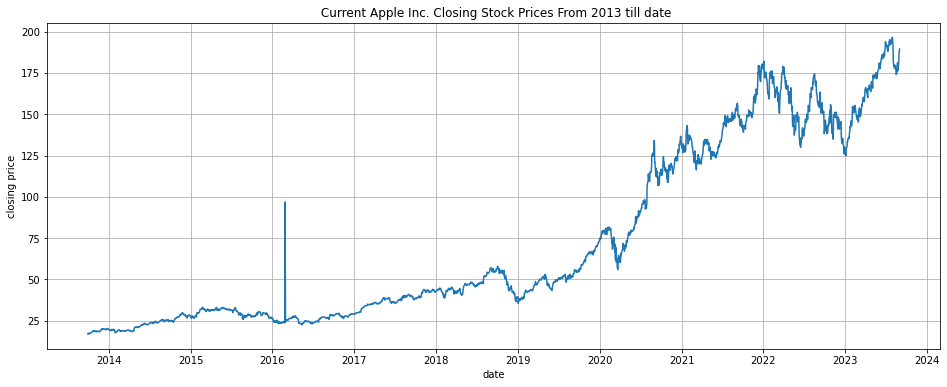

In [54]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df_apple.index, df_apple['close'])
plt.xlabel('date')
plt.ylabel('closing price')
plt.title(' Current Apple Inc. Closing Stock Prices From 2013 till date')
plt.grid(True)
plt.show()

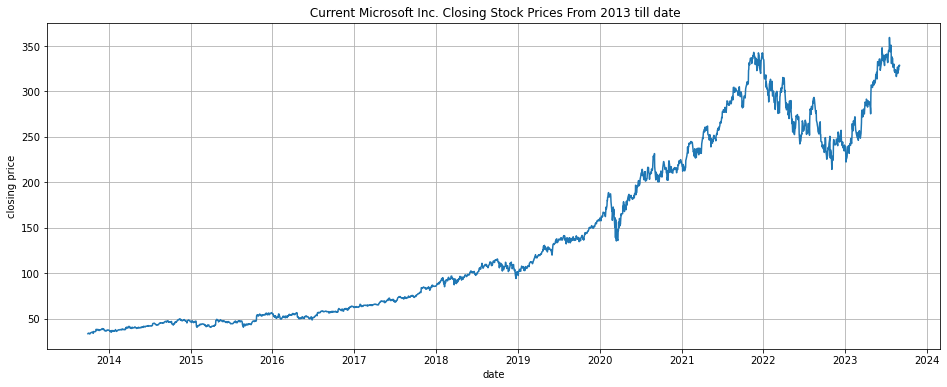

In [55]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df_microsoft.index, df_microsoft['close'])
plt.xlabel('date')
plt.ylabel('closing price')
plt.title(' Current Microsoft Inc. Closing Stock Prices From 2013 till date')
plt.grid(True)
plt.show()

Compare Stock Returns For Both Microsoft Inc. and Apple Inc. Stocks

In [56]:
#sort the df_apple asending by date
df_apple.sort_values(by='date', inplace = True)
#calculate stock returns for aple inc.
df_apple["returns"] = df_apple["close"].pct_change()*100
df_apple.head(10)

,open,high,low,close,volume,returns
date,,,,,,
2013-09-30,17.04,17.20,16.94,17.03,260157888.0,NaN
2013-10-01,17.09,17.47,17.09,17.43,353882976.0,2.348796
2013-10-02,17.34,17.56,17.28,17.48,289183904.0,0.286862
2013-10-03,17.52,17.58,17.17,17.26,322754336.0,-1.258581
2013-10-04,17.28,17.31,17.09,17.25,258869776.0,-0.057937
2013-10-07,17.38,17.59,17.33,17.42,312292736.0,0.985507
2013-10-08,17.50,17.52,17.16,17.18,290916320.0,-1.377727
2013-10-09,17.31,17.42,17.08,17.38,301725152.0,1.164144
2013-10-10,17.55,17.58,17.39,17.49,278602240.0,0.632911


In [63]:
#sort df_microsoft ascending by date
df_microsoft.sort_values(by='date', inplace=True)
#calculate stock returns for microsoft inc.
df_microsoft["returns"] = df_microsoft["close"].pct_change()*100
df_microsoft.head(10)

,open,high,low,close,volume,returns
date,,,,,,
2013-09-30,33.00,33.31,32.70,33.28,39839540.0,NaN
2013-10-01,33.35,33.61,33.30,33.58,36718732.0,0.901442
2013-10-02,33.36,34.03,33.29,33.92,46946812.0,1.012507
2013-10-03,33.88,34.00,33.42,33.86,38707452.0,-0.176887
2013-10-04,33.69,33.99,33.62,33.88,33008108.0,0.059067
2013-10-07,33.60,33.71,33.20,33.30,35069280.0,-1.711924
2013-10-08,33.31,33.33,32.80,33.01,41017584.0,-0.870871
2013-10-09,33.07,33.35,32.96,33.07,35878560.0,0.181763
2013-10-10,33.31,33.89,33.26,33.76,42875140.0,2.086483


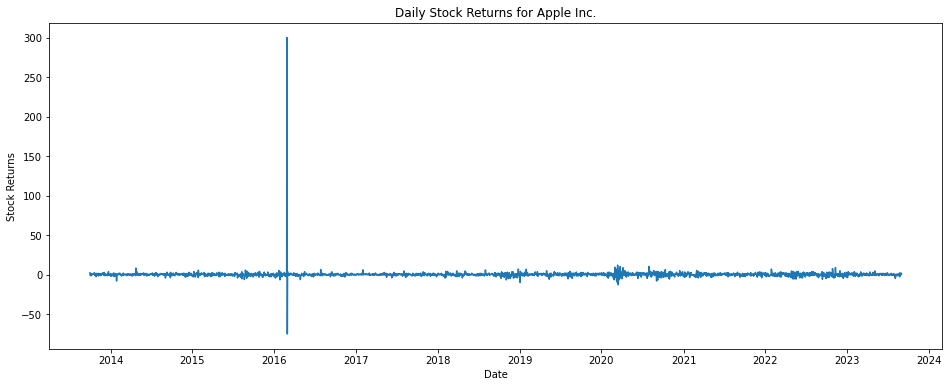

In [71]:
#plotting stock returns for apple inc.
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df_apple.index, df_apple["returns"])
plt.xlabel("Date")
plt.ylabel("Stock Returns")
plt.title("Daily Stock Returns for Apple Inc.")
plt.show();

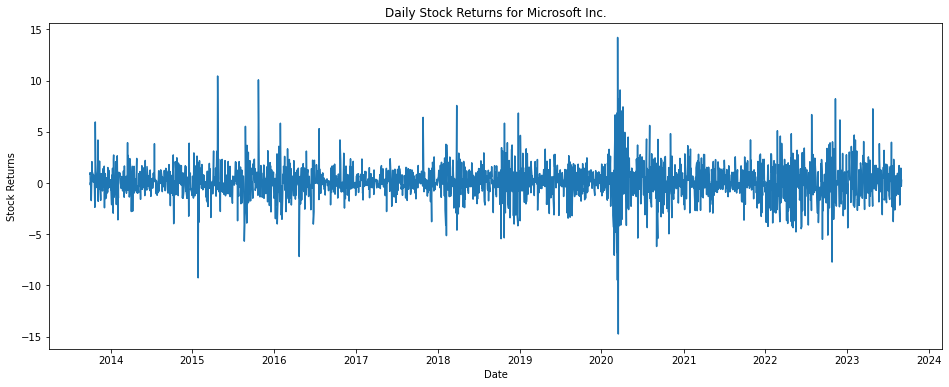

In [72]:
#plotting stock returns for microsoft inc. stocks
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(df_microsoft.index, df_microsoft["returns"])
plt.xlabel("Date")
plt.ylabel("Stock Returns")
plt.title("Daily Stock Returns for Microsoft Inc.")
plt.show()